# Exploração de Dados Projeto Final

### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans



### Importando DATASETs

#### Lendo DATASET

##### Criando um dicionário(features_types) para alterar o tipo do dtype de float64 para float16

In [2]:
features = pd.read_csv('features_dictionary.csv')

In [3]:
features = features.query('Dtype_Ajustado == "int16" or Dtype_Ajustado == "float16"')

In [4]:
features_types = dict(list(features[['Column','Dtype_Ajustado']].values))

##### DataFrame principal

In [5]:
df = pd.read_csv('estaticos_market.csv', dtype= features_types, error_bad_lines=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float16(134), float64(10), int16(2), object(27)
memory usage: 206.8+ MB


In [7]:
df.shape

(462298, 182)

In [8]:
df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.460938,10 a 15,...,43.75,93.25,19.171875,26.0,26.0,27.0,0.0,-3.703125,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.462891,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093750,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.511719,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.199219,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


##### DataFrames auxiliares

In [9]:
df1 = pd.read_csv('estaticos_portfolio1.csv', usecols=['id'])
df2 = pd.read_csv('estaticos_portfolio2.csv', usecols=['id'])
df3 = pd.read_csv('estaticos_portfolio3.csv', usecols=['id'])

In [10]:
df1.head(1)

,id
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...


In [11]:
df2.head(1)

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...


In [12]:
df3.head(1)

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...


In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=182)

#### Analise de colunas nulas

##### As colunas com todos os dados nulos não tem nenhuma relevância para a análise

In [14]:
colunas_nulas = df.isna().sum()
colunas_nulas = colunas_nulas[colunas_nulas.isin([df.shape[0]])]
lista_colunas_nulas = list(colunas_nulas.index)
qtd_lista_colunas_nulas = len(list(colunas_nulas.index))
print('Existem', qtd_lista_colunas_nulas, 'São elas', lista_colunas_nulas)

Existem 5 São elas ['qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_alteracao_socio_365d', 'grau_instrucao_macro_desconhecido']


In [15]:
# Eliminando as colunas com todas as observações nulas
df.drop(columns=lista_colunas_nulas, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 177)


##### As colunas com mais de 50% dos dados nulos não tem muita relevância para a análise, para chegar no número de 50% alem da quantidade de nulos foi levado em consideração a relevância da coluna para a solução.

In [16]:
colunas_nulas_perc = (df.isna().sum()/df.shape[0]*100) > 50.0 
colunas_nulas_perc = colunas_nulas_perc[colunas_nulas_perc.isin([True])]
len(list(colunas_nulas_perc.index))
lista_colunas_nulas_perc = list(colunas_nulas_perc.index)
qtd_lista_colunas_nulas_perc = len(list(colunas_nulas_perc.index))
print('Existem', qtd_lista_colunas_nulas_perc, 'São elas', lista_colunas_nulas_perc)

Existem 126 São elas ['vl_total_tancagem', 'vl_total_veiculos_antt', 'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 'qt_socios_pep', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj', 'vl_idade_minima_socios_pj', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas', 'idade_maxima_coligadas', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 'coligada_mais_nova_baixada', 'coligada_mais_antiga_baixada', 'idade_media_coligadas_baixadas', 'qt_colig

In [17]:
# Eliminando as colunas com observações nulas em mais de 50%
df.drop(columns=lista_colunas_nulas_perc, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 51)


##### Verificar as colunas nulas restantes, e analisar a relevância

In [18]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

qt_socios_st_regular                     0.335102
idade_minima_socios                      0.327931
idade_maxima_socios                      0.327931
idade_media_socios                       0.327931
empsetorcensitariofaixarendapopulacao    0.311118
qt_socios_pj                             0.248954
qt_socios_pf                             0.248954
qt_socios                                0.248954
fl_optante_simei                         0.178917
fl_optante_simples                       0.178917
nm_micro_regiao                          0.126970
nm_meso_regiao                           0.126970
nu_meses_rescencia                       0.097937
de_faixa_faturamento_estimado            0.059514
vl_faturamento_estimado_grupo_aux        0.059514
de_faixa_faturamento_estimado_grupo      0.059514
vl_faturamento_estimado_aux              0.059514
de_saude_rescencia                       0.032124
de_saude_tributaria                      0.032124
de_nivel_atividade                       0.024158


##### Analise das colunas restantes, para verificar a possibilidade de eliminar mais alguma coluna irrelevante para a solução.

In [19]:
colunas_drop = ['Unnamed: 0','fl_email','fl_telefone','qt_socios_st_regular','qt_socios_pj',
                'qt_socios_pf','fl_simples_irregular','fl_optante_simei','fl_optante_simples']

**Unnamed**: 0: numeração das observações

**fl_email**: boolean value, true if the cnpj has an email registered at the IRF database. 

**fl_telefone**: boolean value, true if the company has a phone number registered in IRS database.

**qt_socios_st_regular**: integer value, quantity of partners with regular situation under IRS - Receita Federal

**qt_socios_pj**:  integer value, quantity of partners/shareholders of the cnpj that are companies

**qt_socios_pf**: integer value, quantity of partners/shareholders of the cnpj that are persons

**fl_simples_irregular**: boolean, true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.

**fl_optante_simei**: boolean, true if the company is taxed as an MEI - Individual Micro Entrepreneur (Micro Empreendedor Individual)

**fl_optante_simples**: boolean, true if the company is taxed according to SIMPLES regime

In [20]:
# Eliminando colunas julgadas irrelevantes
df.drop(columns=colunas_drop, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 42)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     462298 non-null  object 
 1   fl_matriz                              462298 non-null  bool   
 2   de_natureza_juridica                   462298 non-null  object 
 3   sg_uf                                  462298 non-null  object 
 4   natureza_juridica_macro                462298 non-null  object 
 5   de_ramo                                462298 non-null  object 
 6   setor                                  460371 non-null  object 
 7   idade_empresa_anos                     462298 non-null  float16
 8   idade_emp_cat                          462298 non-null  object 
 9   fl_me                                  462298 non-null  bool   
 10  fl_sa                                  462298 non-null  

##### Criando um novo dataset, substituindo a media nas colunas numéricas e dropando os dados nulos da demais colunas para análise

In [22]:
#df_nao_nulos = df.fillna(df.mean())

In [23]:
df_nao_nulos = df.dropna()
print('O novo shape é', df_nao_nulos.shape)

O novo shape é (173463, 42)


### Exploração de Dados

##### Ajustando todos os dados para numéricos

In [24]:
# Selecionando as colunas tipo boleanas
colunas_bool = list(df_nao_nulos.select_dtypes(include='bool').columns)

In [25]:
df_nao_nulos = pd.get_dummies(df_nao_nulos, columns=colunas_bool)

In [26]:
# Para as demais colunas vamos usar o LabelEncoder
colunas_object = list(df_nao_nulos.select_dtypes(include='object').columns)
colunas_object.remove('id')
encoder = LabelEncoder()
for label in colunas_object:
    label_coluna = 'cod_' + label
    df_nao_nulos[label_coluna] = encoder.fit_transform(df_nao_nulos[label])

In [27]:
# Selecionando apenas as colunas numéricas
colunas_number = list(df_nao_nulos.select_dtypes(include='number').columns)
base = df_nao_nulos[colunas_number]

In [28]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173463 entries, 1 to 462295
Data columns (total 47 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   idade_empresa_anos                       173463 non-null  float16
 1   vl_total_veiculos_pesados_grupo          173463 non-null  float64
 2   vl_total_veiculos_leves_grupo            173463 non-null  float64
 3   nu_meses_rescencia                       173463 non-null  float64
 4   empsetorcensitariofaixarendapopulacao    173463 non-null  float64
 5   qt_socios                                173463 non-null  float64
 6   idade_media_socios                       173463 non-null  float64
 7   idade_maxima_socios                      173463 non-null  float64
 8   idade_minima_socios                      173463 non-null  float64
 9   vl_faturamento_estimado_aux              173463 non-null  float64
 10  vl_faturamento_estimado_grupo_au

In [29]:
base.describe()

,idade_empresa_anos,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,nu_meses_rescencia,empsetorcensitariofaixarendapopulacao,qt_socios,idade_media_socios,idade_maxima_socios,idade_minima_socios,vl_faturamento_estimado_aux,...,cod_fl_veiculo,cod_sg_uf_matriz,cod_de_saude_tributaria,cod_de_saude_rescencia,cod_de_nivel_atividade,cod_nm_meso_regiao,cod_nm_micro_regiao,cod_fl_passivel_iss,cod_de_faixa_faturamento_estimado,cod_de_faixa_faturamento_estimado_grupo
count,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,1.734630e+05,...,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000,173463.000000
mean,NaN,7.500424,108.122038,24.599442,1331.244931,1.658786,43.510077,45.245845,41.855375,7.944860e+05,...,0.074471,11.405072,2.428841,0.099387,1.026305,6.867055,36.903490,0.592103,5.983449,5.634983
std,0.000000,105.225336,1791.154652,9.304771,1267.582221,4.207828,12.425598,13.869276,12.355991,1.395289e+07,...,0.262537,6.703392,1.663624,0.299201,0.939442,4.347381,21.513393,0.491445,4.192961,4.156485
min,0.802734,0.000000,0.000000,6.000000,100.000000,1.000000,-2.000000,-2.000000,-2.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.115234,0.000000,0.000000,22.000000,648.550000,1.000000,34.000000,35.000000,33.000000,5.000000e+04,...,0.000000,9.000000,1.000000,0.000000,0.000000,4.000000,20.000000,0.000000,1.000000,1.000000
50%,5.859375,0.000000,0.000000,23.000000,926.640000,1.000000,42.500000,44.000000,40.000000,2.100000e+05,...,0.000000,9.000000,3.000000,0.000000,1.000000,6.000000,43.000000,1.000000,7.000000,7.000000
75%,10.671875,0.000000,0.000000,25.000000,1502.270000,2.000000,52.000000,54.000000,50.000000,2.100000e+05,...,0.000000,19.000000,4.000000,0.000000,2.000000,10.000000,48.000000,1.000000,10.000000,10.000000
max,77.500000,3484.000000,122090.000000,66.000000,75093.840000,246.000000,121.000000,125.000000,121.000000,2.669847e+09,...,1.000000,26.000000,5.000000,2.000000,3.000000,18.000000,72.000000,1.000000,11.000000,10.000000


In [30]:
X = base.values

### Modelo Machine Learning

In [31]:
kmeans = KMeans(n_clusters = 2, init = 'random')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [32]:
kmeans.cluster_centers_

array([[ 1.78418701e+01,  1.32524356e+03,  8.56852693e+03,
         2.55737705e+01,  1.23607061e+03,  7.22599532e+01,
         5.08032831e+01,  6.67400468e+01,  3.83419204e+01,
         5.20328075e+06,  1.97959551e+11,  8.36937237e+03,
         1.00000000e+00,  4.55191440e-15,  1.00000000e+00,
        -1.73472348e-18,  2.10772834e-02,  9.78922717e-01,
         1.00000000e+00,  1.00000000e+00,  4.27435864e-15,
         1.00000000e+00, -6.93889390e-18,  1.00000000e+00,
        -7.58941521e-19,  1.18220141e+01,  2.40281030e+00,
        -8.65973959e-15,  2.47564403e+01,  3.97892272e+00,
         2.88290398e+00,  2.45610539e+03,  3.13817330e-01,
         1.84379391e+01,  6.16627635e+00,  2.34192037e-03,
         5.89805982e-17,  1.40515222e-02,  1.79110070e+01,
         3.93208431e+00, -6.24500451e-16,  5.08196721e-01,
         7.53864169e+00,  3.61569087e+01,  9.78922717e-01,
         6.72599532e+00,  5.59552404e-14],
       [ 8.71299895e+00,  4.24863612e+00,  8.72443422e+01,
         2.45

In [33]:
distance = kmeans.fit_transform(X)
distance

array([[1.93985046e+08, 1.97959341e+11],
       [1.94145584e+08, 1.97959501e+11],
       [1.93985046e+08, 1.97959341e+11],
       ...,
       [1.94071682e+08, 1.97959427e+11],
       [1.94145584e+08, 1.97959501e+11],
       [1.93985046e+08, 1.97959341e+11]])

In [34]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

1 1.839743513476586e+25
2 1.738090114434736e+24
3 4.1876614316486854e+23
4 3.613751405807723e+23
5 3.409340988979365e+23
6 3.3926569533492894e+23
7 3.385537631680104e+23
8 1.3149081969557897e+23
9 3.332065347094293e+23
10 3.331665265221249e+23


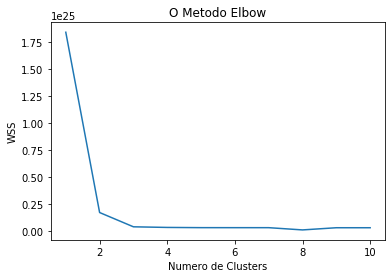

In [36]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

O gráfico mostra o somatório da variância dos dados em relação ao número de clusters para conseguir verificar até que ponto com o aumento do número de clusters não existe ganho.

Observe que a partir do número de 2 clusters as distâncias dos erros quadráticos praticamente se estabiliza.

A partir desse ponto que não existe uma discrepância tão significativa em termos de variância.